In [262]:

!pip install opendatasets
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

#About Dataset
Explore the salaries of higher education employees from Ohio's public universities dating back to 2011.

This dataset offers insights into the earnings of various positions across multiple institutions. Please note that benefits are not included in the reported salaries.

In [263]:
datasetlink = "https://www.kaggle.com/datasets/asaniczka/university-employee-salaries-2011-present"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 17.5M/17.5M [00:01<00:00, 13.0MB/s]


In [264]:
os.chdir("university-employee-salaries-2011-present")
os.listdir()

['higher_ed_employee_salaries.csv']

In [265]:
archivo = 'higher_ed_employee_salaries.csv'
df = pd.read_csv(archivo)
df.head(10)

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
5,Amanda Potter,The Ohio State University,Program Coordinator,WCA-Education,48806.72,2013
6,Susan Marie Potter,The Ohio State University,Program Manager,College of Nursing,65216.00,2013
7,Katrina Potter,Miami University,Personnel Technician,VP for Acad Affrs-Provost,24324.14,2012
8,Pamela Lynn Potter,Bowling Green State University,Administrative Assistant 2,Center for Teaching & Learning,51496.58,2012
9,Kimberly J Potter,The Ohio State University,Policy Anlyst/Compliance Offcr,Legal Affairs Administration,20868.00,2015


In [266]:
df.shape

(934348, 6)

In [267]:
df = df.drop_duplicates()

In [268]:
df.shape

(801136, 6)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801136 entries, 0 to 934347
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             801136 non-null  object 
 1   School           801136 non-null  object 
 2   Job Description  778573 non-null  object 
 3   Department       750021 non-null  object 
 4   Earnings         792807 non-null  float64
 5   Year             801136 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 42.8+ MB


In [270]:
df['Earnings'] = df['Earnings'].round(0)

In [271]:
df.sample(5)

,Name,School,Job Description,Department,Earnings,Year
607669,Sarah Ruby,University of Toledo,Staff Nurse,Endoscopy Suite,68006.0,2019
303063,Susan R. Fisk,Kent State University,Assistant Professor,Sociology,65000.0,2015
260840,Richard D Minerd Jr.,The Ohio State University,Auxiliary Law Enforcement Ofcr,Special Duty,12768.0,2016
836776,Amy Hines,Miami University,Administrative Assistant,VP for Acad Affrs-Provost,19529.0,2016
377780,Patricia Hogue,University of Toledo,Chair/Assoc Prof/Assoc Dean,Physician Assistant Studies,146170.0,2015


In [272]:
df.isnull().sum()

Name                   0
School                 0
Job Description    22563
Department         51115
Earnings            8329
Year                   0
dtype: int64

In [273]:
df = df[~df['Earnings'].isnull()]
df = df[df['Earnings'] >=10000]

In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Earnings,653508.0,65859.228906,63314.124464,10000.0,34746.0,52500.0,78574.0,8021377.0
Year,653508.0,2017.170295,3.173557,2011.0,2015.0,2017.0,2020.0,2022.0


In [275]:
P = np.percentile(df['Earnings'], [1, 99])
df = df[(df['Earnings'] > P[0]) & (df['Earnings'] < P[1])]

In [276]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Earnings,640434.0,62465.460243,41672.403466,10916.0,35000.0,52500.0,77818.0,299655.0
Year,640434.0,2017.163380,3.173586,2011.0,2015.0,2017.0,2020.0,2022.0


In [277]:
df.isnull().sum()

Name                   0
School                 0
Job Description    15340
Department         44664
Earnings               0
Year                   0
dtype: int64

In [278]:
print('# of departments {}'.format(len(df['Department'].unique())))

# of departments 8842


In [279]:
df['Department'].value_counts().head(10)

Department
University Hospitals              33363
Cancer Hosp & Research Instit     25196
University                        17387
Health System                     14944
Shared Services                   10179
University Hospitals East          8586
Internal Medicine                  7131
Ross Heart Hospital                6273
Comprehensive Cancer Center RU     4716
Pediatrics                         4104
Name: count, dtype: int64

In [280]:
print('# of jobs {}'.format(len(df['Job Description'].unique())))

# of jobs 34853


In [281]:
df['Job Description'].value_counts().head(10)

Job Description
Professor                       23528
Associate Professor             21128
Assistant Professor             15611
Staff Nurse-B                   15171
Clinical Inst HS                 9519
Lecturer                         7945
Custodial Worker                 7579
Patient Care Associate           6983
Assistant Professor-Clinical     5838
Staff Nurse                      5334
Name: count, dtype: int64

In [282]:
df = df[~df['Department'].isnull()]
df = df[~df['Job Description'].isnull()]

In [283]:
df.isnull().sum()

Name               0
School             0
Job Description    0
Department         0
Earnings           0
Year               0
dtype: int64

In [284]:
df['Name'] = df['Name'].apply(lambda x: x.split()[0])

In [285]:
df

,Name,School,Job Description,Department,Earnings,Year
1,Emily,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.0,2022
2,Carol,The Ohio State University,Associate Professor-Clinical,Pediatrics,22723.0,2013
3,Kim,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.0,2022
5,Amanda,The Ohio State University,Program Coordinator,WCA-Education,48807.0,2013
6,Susan,The Ohio State University,Program Manager,College of Nursing,65216.0,2013
...,...,...,...,...,...,...
934342,Kevin,Bowling Green State University,Asst Men's Basketbal Coach,Basketball - Men,86981.0,2020
934343,Danielle,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.0,2021
934345,Kristen,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243034.0,2018
934346,Danielle,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.0,2022


In [286]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Earnings,586038.0,62431.907847,42035.537998,10916.0,34545.0,52530.0,77944.75,299655.0
Year,586038.0,2017.095453,3.216668,2011.0,2014.0,2017.0,2020.00,2022.0


In [287]:
top_10_jobs=df.groupby("Job Description")['Earnings'].mean().reset_index(name='salary mean').sort_values(by='salary mean', ascending=False).head(10)
top_10_jobs

,Job Description,salary mean
29247,VP for U Advancement,299129.0
17425,Int VP D&I/Dean Coll Arts&Ltrs,298335.0
22870,"Prof Pract, Accountancy",298267.0
23821,Provost & Sr VP Acad Affairs,297639.0
14922,"Exec VP, CPM",297600.0
27214,"Sr VP, Strat Comm & Ext Affair",297279.0
10771,"Dean, College Of Business",297212.5
95,ARMCO Alumni Assoc Professor,296836.0
8424,Chief Operating Officer - UTMC,296585.0
10809,"Dean, Russ College Of Engineering And Technology",295000.0


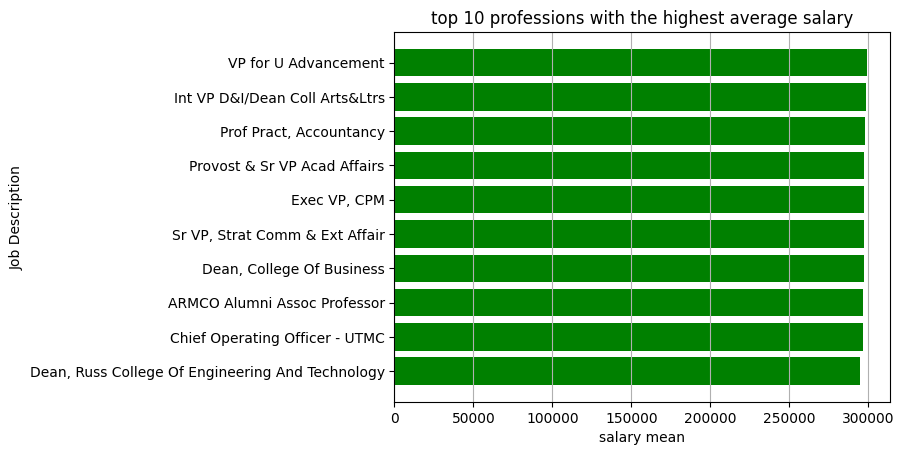

In [288]:
fig, ax = plt.subplots()
ax.barh(top_10_jobs['Job Description'],top_10_jobs['salary mean'],color='green' )
ax.set_title('top 10 professions with the highest average salary')
ax.set_xlabel('salary mean')
ax.set_ylabel('Job Description')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [289]:
top_10_depar=df.groupby("Department")['Earnings'].mean().reset_index(name='salary mean').sort_values(by='salary mean', ascending=False).head(10)
top_10_depar

,Department,salary mean
8485,VP for Legal Affairs and General Counsel,292875.000000
4750,Human Resources | Shared Services,281873.000000
593,Academic Affairs Administration | External Eng...,274332.000000
5761,Medicine | Internal Medicine Infectious Disease,264155.333333
2133,COM Pediatrics,248897.500000
4060,FGP-Radiology,235470.000000
3802,Executive VP to the President,230000.000000
4061,FGP-Spine/Neuro,229527.400000
595,Academic Affairs Administration | Inclusive Ex...,220189.000000
5753,Medicine | IM Hospital Medicine,217040.410448


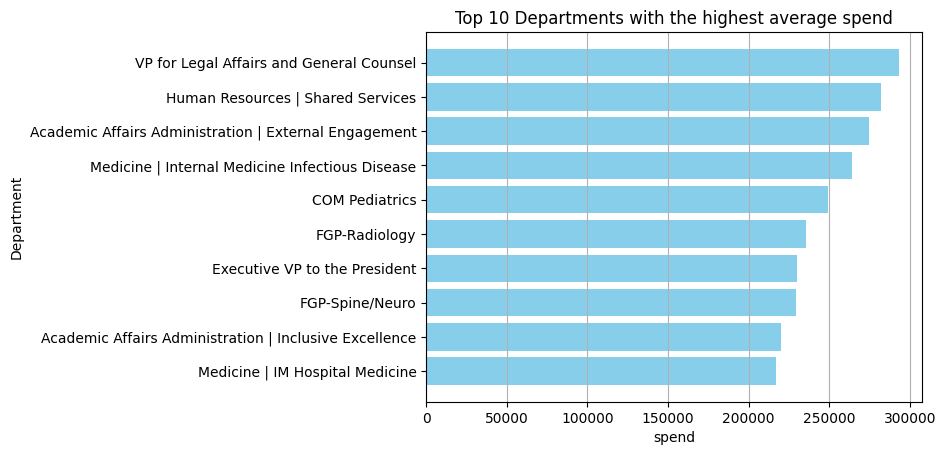

In [290]:
fig, ax = plt.subplots()
ax.barh(top_10_depar['Department'],top_10_depar['salary mean'],color='skyblue' )
ax.set_title('Top 10 Departments with the highest average spend')
ax.set_xlabel('spend')
ax.set_ylabel('Department')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [291]:
total_spend=df.groupby("School")['Earnings'].sum().reset_index(name='total spend').sort_values(by='total spend', ascending=False).head(13)
total_spend

,School,total spend
7,The Ohio State University,1.956968e+10
10,University of Toledo,3.439272e+09
3,Kent State University,2.558717e+09
4,Miami University,2.059267e+09
5,Ohio University,1.983306e+09
11,Wright State University,1.673851e+09
8,University Of Cincinnati,1.653196e+09
0,Bowling Green State University,1.368302e+09
12,Youngstown State University,7.208942e+08
2,Cleveland State University,7.133161e+08


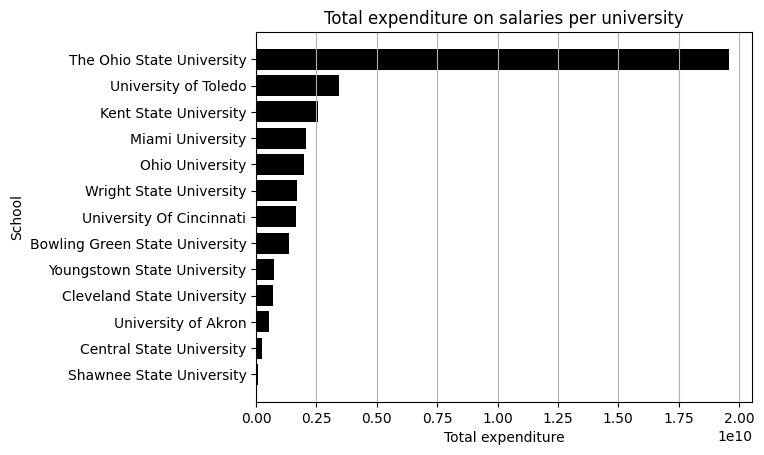

In [292]:
fig, ax = plt.subplots()
ax.barh(total_spend['School'],total_spend['total spend'],color='black' )
ax.set_title('Total expenditure on salaries per university')
ax.set_xlabel('Total expenditure')
ax.set_ylabel('School')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()